# Figure 4: Radiation Biases with CERES-EBAF and cloud biases

### Add paths to run locally or off NIRD

In [10]:
import sys
# Add common resources folder to path
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/")
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png, mute_ax, align_yaxis
    )

from classes import SatComp_Metric, CT_SLF_Metric
from collections import deque
%matplotlib inline

### Check running location and adjust working directory appropriately.

In [2]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = 'figures/'
case_dir = 'satcomp/'   # inconsistent label compared to jupy_test
conv_dir ='convectivephase/'

# Check that each important directory can be accessed:    
access_paths = os.path.exists(output_dir) and os.path.exists(case_dir) and os.path.exists(conv_dir)
print('Can access all directory paths:', access_paths)

Running through MC2 Jupyter Hub
Can access all directory paths: True


## Load data into metric classes

In [3]:
allcases = SatComp_Metric(case_dir)

allcases.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
allcases.add_case('CESM2_slfvars', label="CAM6")
allcases.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

allcases.add_case("20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10",label='CAM6-Oslo \n Fit 1')
# allcases.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_0.05',label='CAM6-OsloIce \n Fit 2')
allcases.add_case('20200629_morn_cam61satcomp_wbf_0.5_inp_0.05',label='CAM6-OsloIce \n Fit 2')
allcases.add_case('20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1',label='CAM6-OsloIce \n Fit 3')
allcases.add_case('20200713_CESM2_satcomp_wbf_1_inp_100',label="CAM6 \n Fit 4")

Loading GOCCP data...done.
Loading CALIOP SLFs...done
Loading CERES-EBAF fluxes...done.
Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1
20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for CESM2_slfvars
CESM2_slfvars load successfully.
Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1
20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1 load successfully.
Trying to load concatenated file for 20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10
20200512_013308_fitting_runs_cam6satcomp16_wbf_1.25_inp_10 load successfully.
Trying to load concatenated file for 20200629_morn_cam61satcomp_wbf_0.5_inp_0.05
20200629_morn_cam61satcomp_wbf_0.5_inp_0.05 load successfully.
Trying to load concatenated file for 20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1
20200512_012745_fitting_runs_cam61satcomp_wbf_0.2_inp_0.1 load successfully.
Trying to load

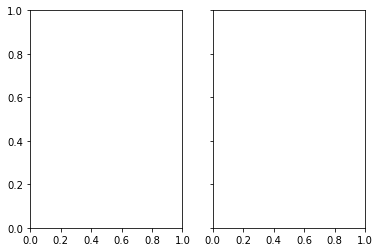

In [13]:
_fig,_axs = plt.subplots(nrows=1,ncols=2,sharey='row')
_axs = _axs.flat

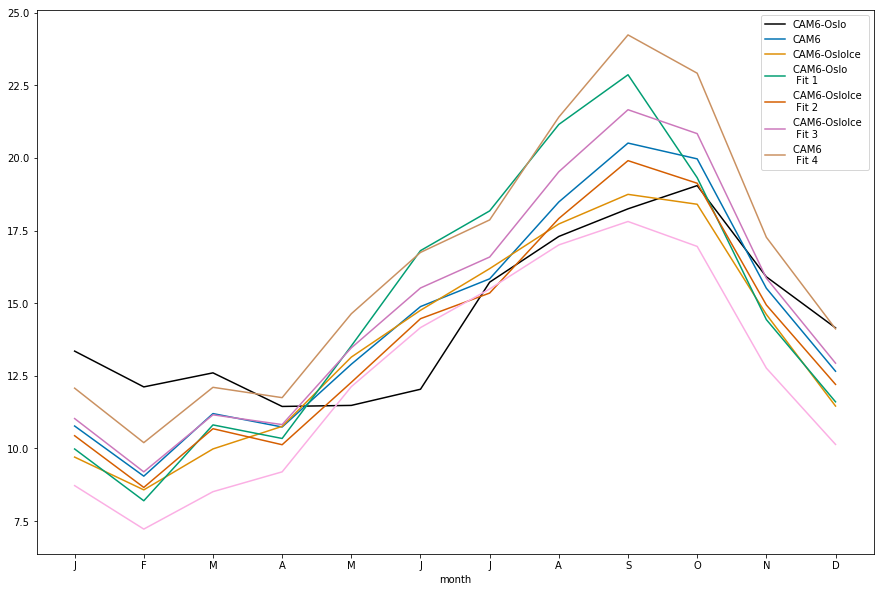

In [52]:
out1 = allcases.plot_months_line('LWCF', bias=False)

/opt/conda/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


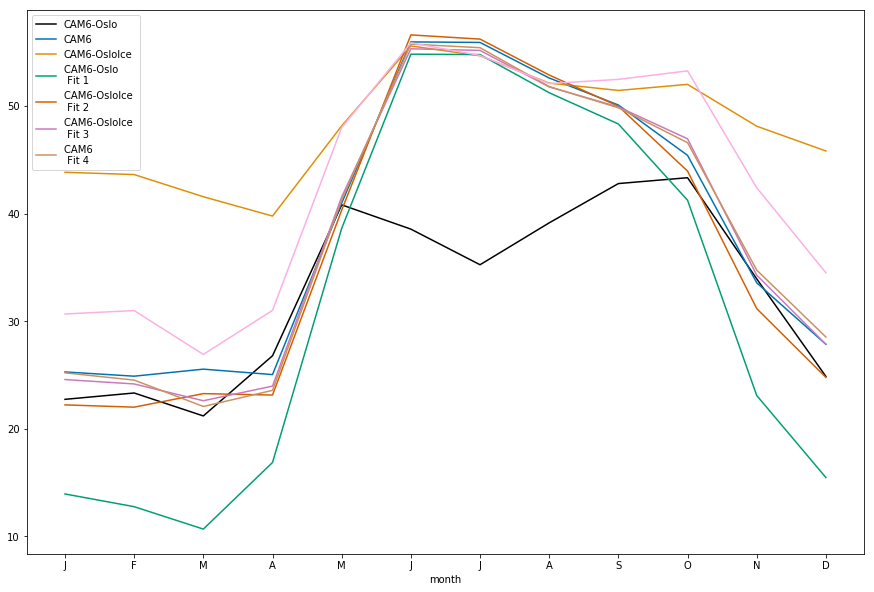

In [50]:
out1 = allcases.plot_months_line('CLDLOW_CAL_LIQ', bias=False)

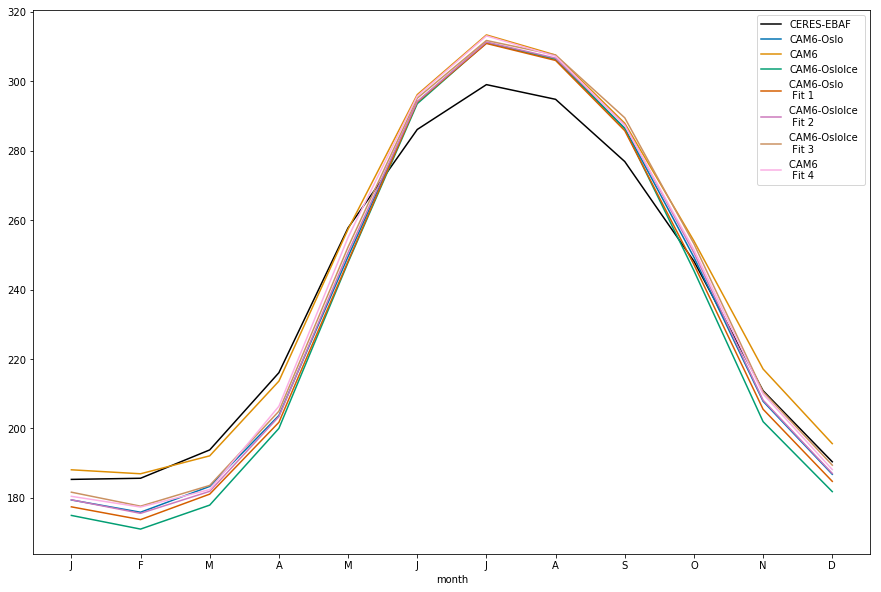

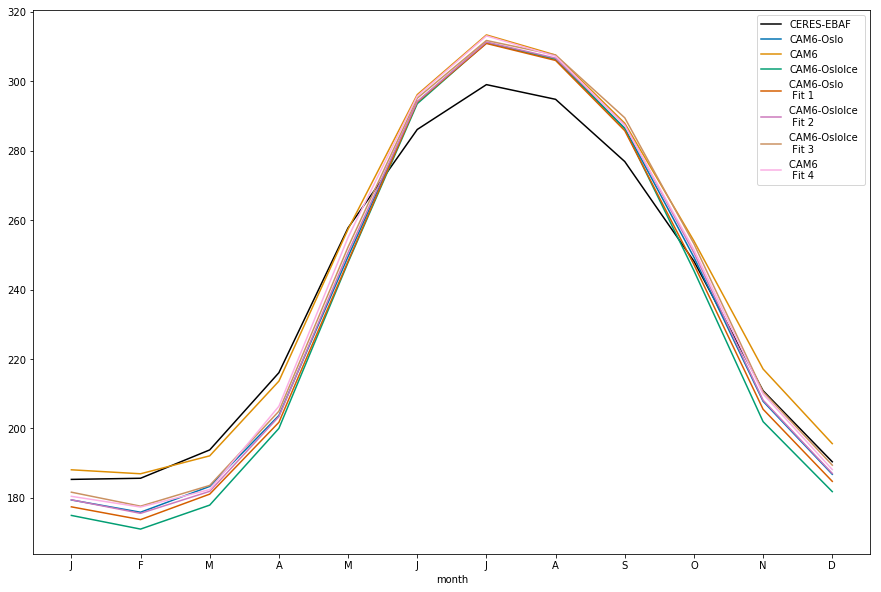

In [54]:
allcases.plot_months_line('FLDS', bias=False)

## Plot the stuff

Text(0.55,0.42,'d.')

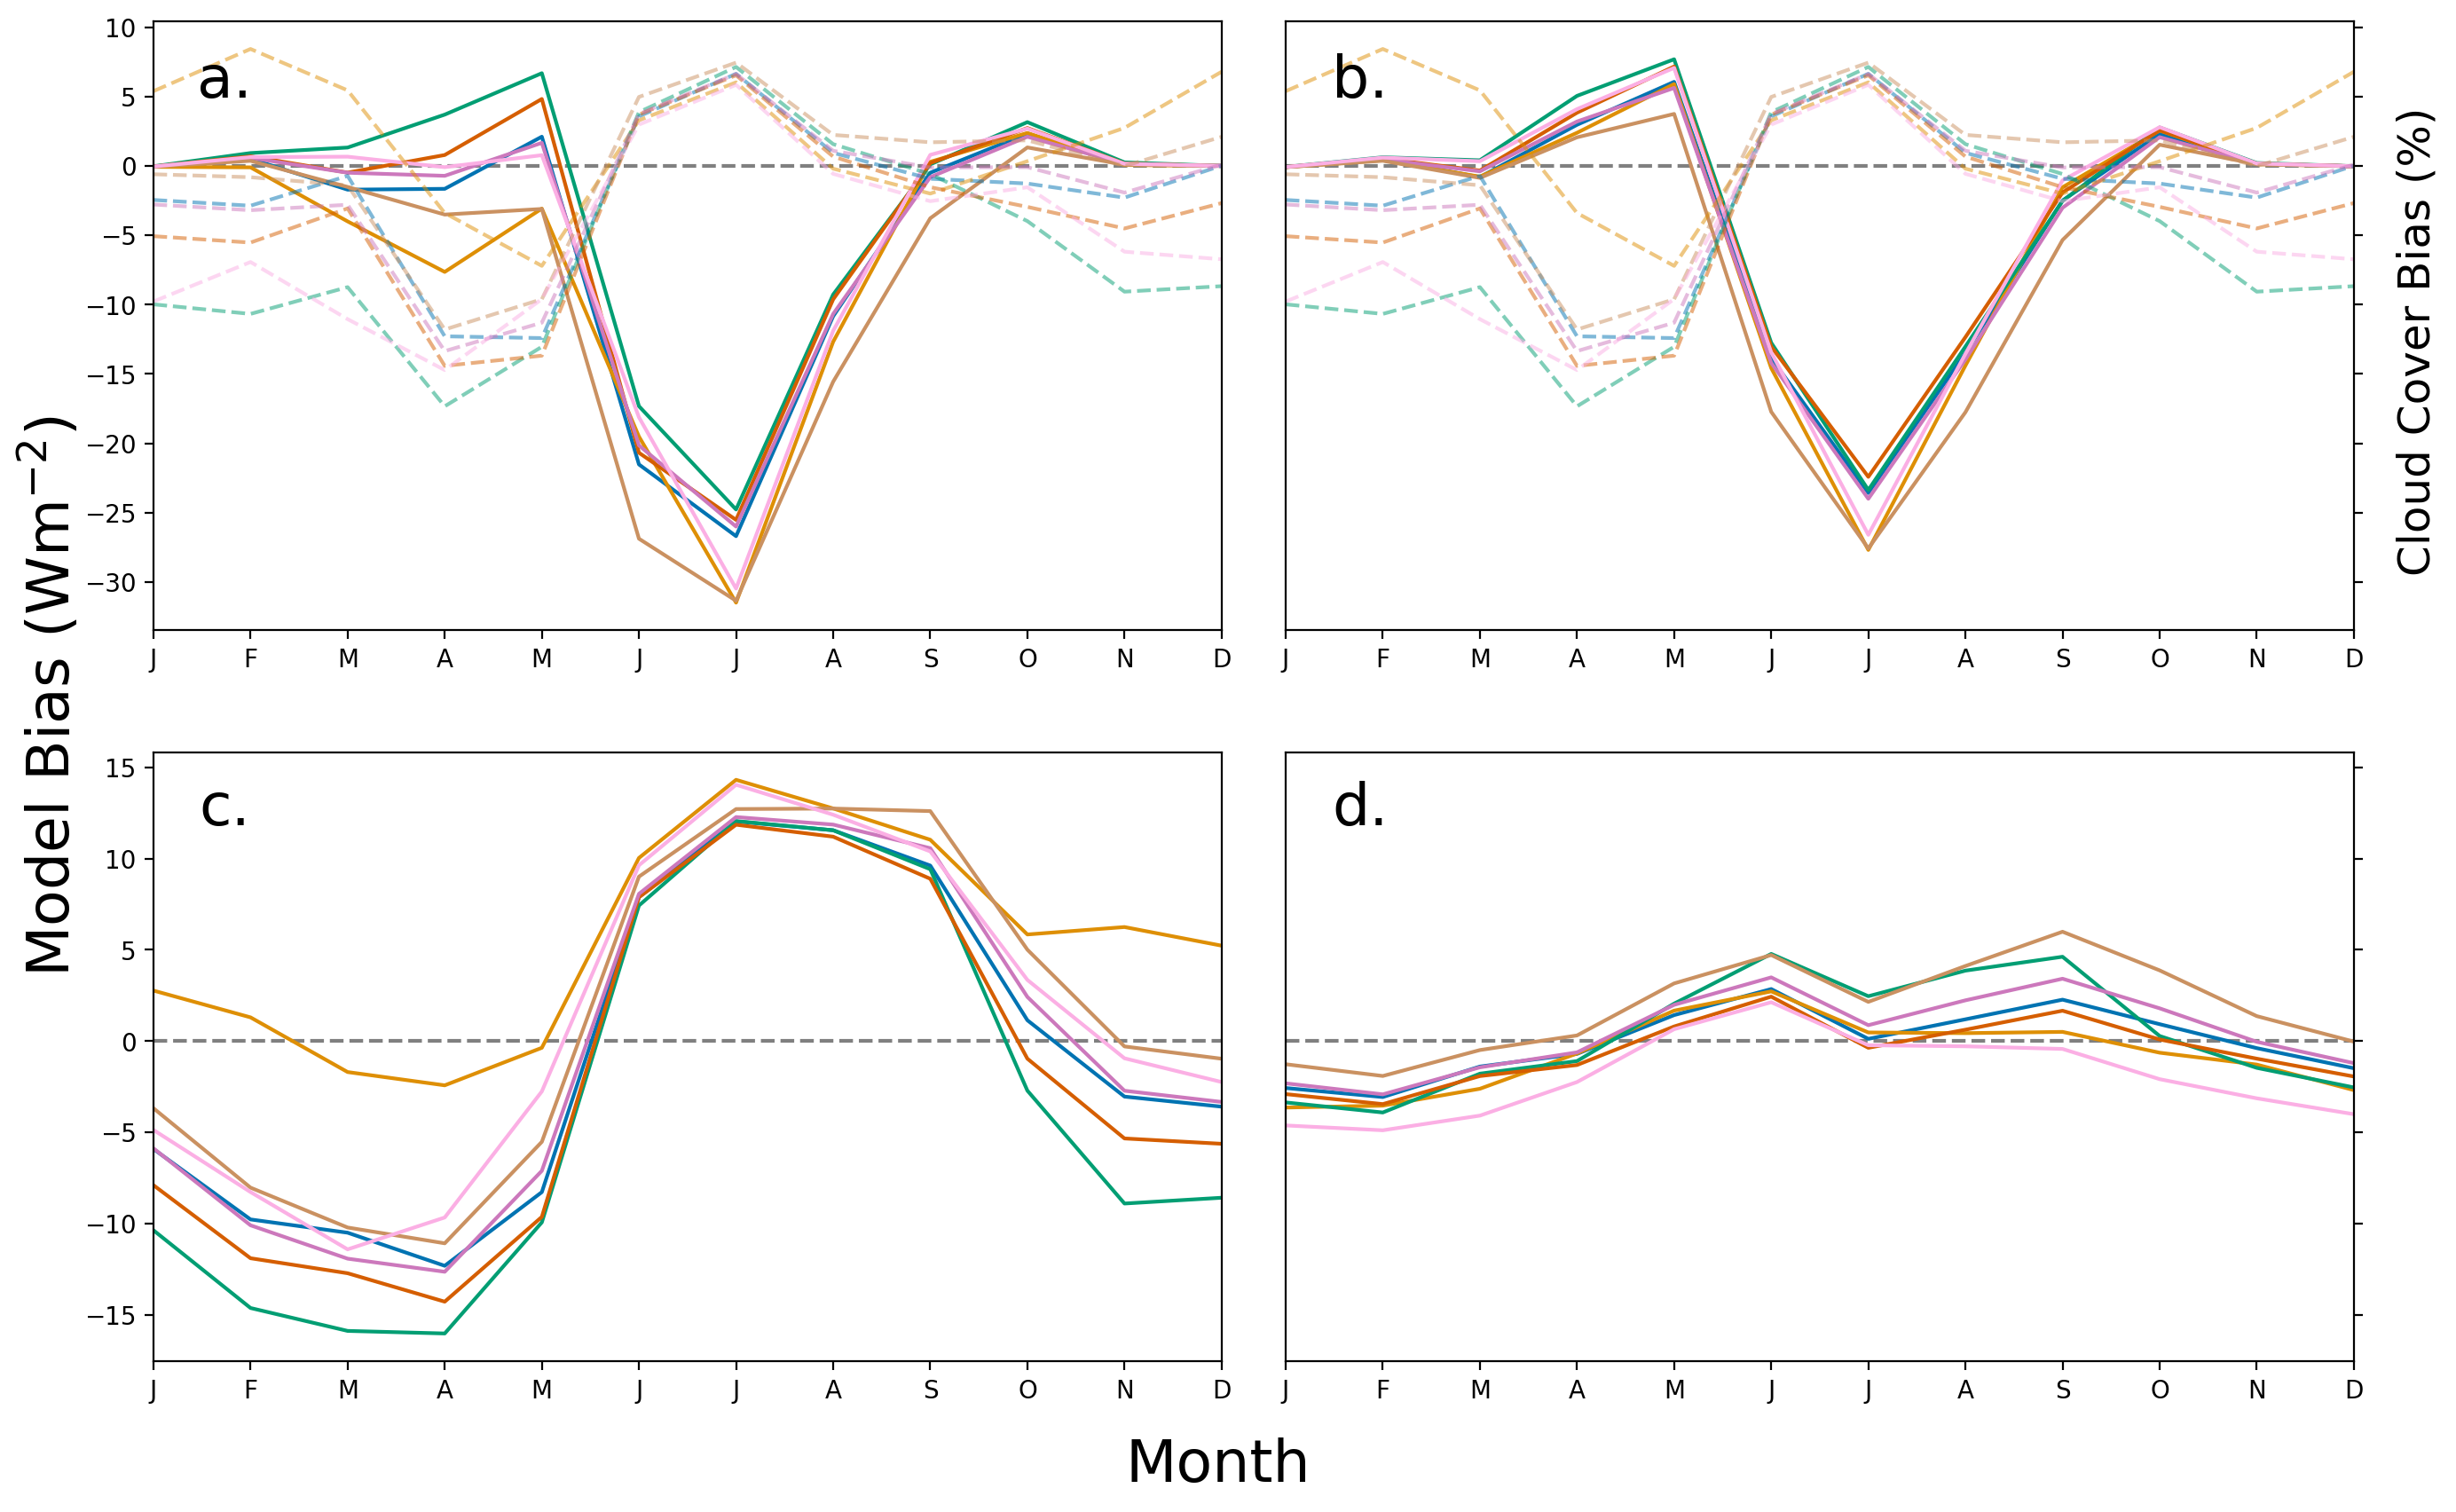

In [61]:
fig,axs = plt.subplots(nrows=2,ncols=2,sharey='row')
fig.set_figheight(10)
fig.set_figwidth(16)
fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.06)

allcases.plot_months_line('FSDS',ax=axs[0], bias=True)
allcases.plot_months_line('SWCF',ax=axs[1], bias=True)
allcases.plot_months_line('FLDS',ax=axs[2], bias=True)
allcases.plot_months_line('LWCF',ax=axs[3], bias=True)

allcases.plot_months_line('CLDTOT_CAL',ax=axs[0], bias=True, linestyle='dashed',alpha=0.5)
allcases.plot_months_line('CLDTOT_CAL',ax=axs[1], bias=True, linestyle='dashed',alpha=0.5)
# allcases.plot_months_line('CLDTOT_CAL_LIQ',ax=axs[2], bias=True, linestyle='dashed',alpha=0.5)
# allcases.plot_months_line('CLDTOT_CAL',ax=axs[3], bias=True, linestyle='dashed',alpha=0.5)

# Mute existing labels and draw zero lines
for i in axs:
    mute_ax(i)
    i.hlines(0,1,12, linestyle='dashed',color='gray')
    i.set_xlim(1,12)

# Janky share yaxis so I can have more ticks:
# _min,_max = np.max([axs[0].get_ylim(),axs[1].get_ylim()])
axs[1].yaxis.tick_right()
# axs[1].set_ylim(axs[0].get_ylim())
axs[3].yaxis.tick_right()
# axs[3].set_ylim(axs[2].get_ylim())
    
# Mute legends after the first
# fig.axes[-1].legend().set_visible(False)
# fig.axes[-2].legend().set_visible(False)
# fig.axes[-3].legend().set_visible(False)
 
# axs[1].set_yticklabels([])

# Trying Latex formatting
# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')

# Re-label
fig.text(0.1, 0.5, r'Model Bias (Wm$^{-2}$)', va='bottom', ha='center', rotation='vertical', 
         rotation_mode='anchor', fontsize=24)
# fig.text(0.93, 0.7, r'Cloud Cover Bias (%)', va='bottom', ha='center', rotation='vertical', 
#          rotation_mode='anchor', fontsize=18)
# fig.text(0.93, 0.5, r'Cloud Cover Bias (%)', va='bottom', ha='center', rotation='vertical', 
#          rotation_mode='anchor', fontsize=22)
fig.text(0.5, 0.05, 'Month', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

fig.text(0.15, 0.83, 'a.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.55, 0.83, 'b.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.15, 0.42, 'c.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.55, 0.42, 'd.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

Text(0.55,0.42,'d.')

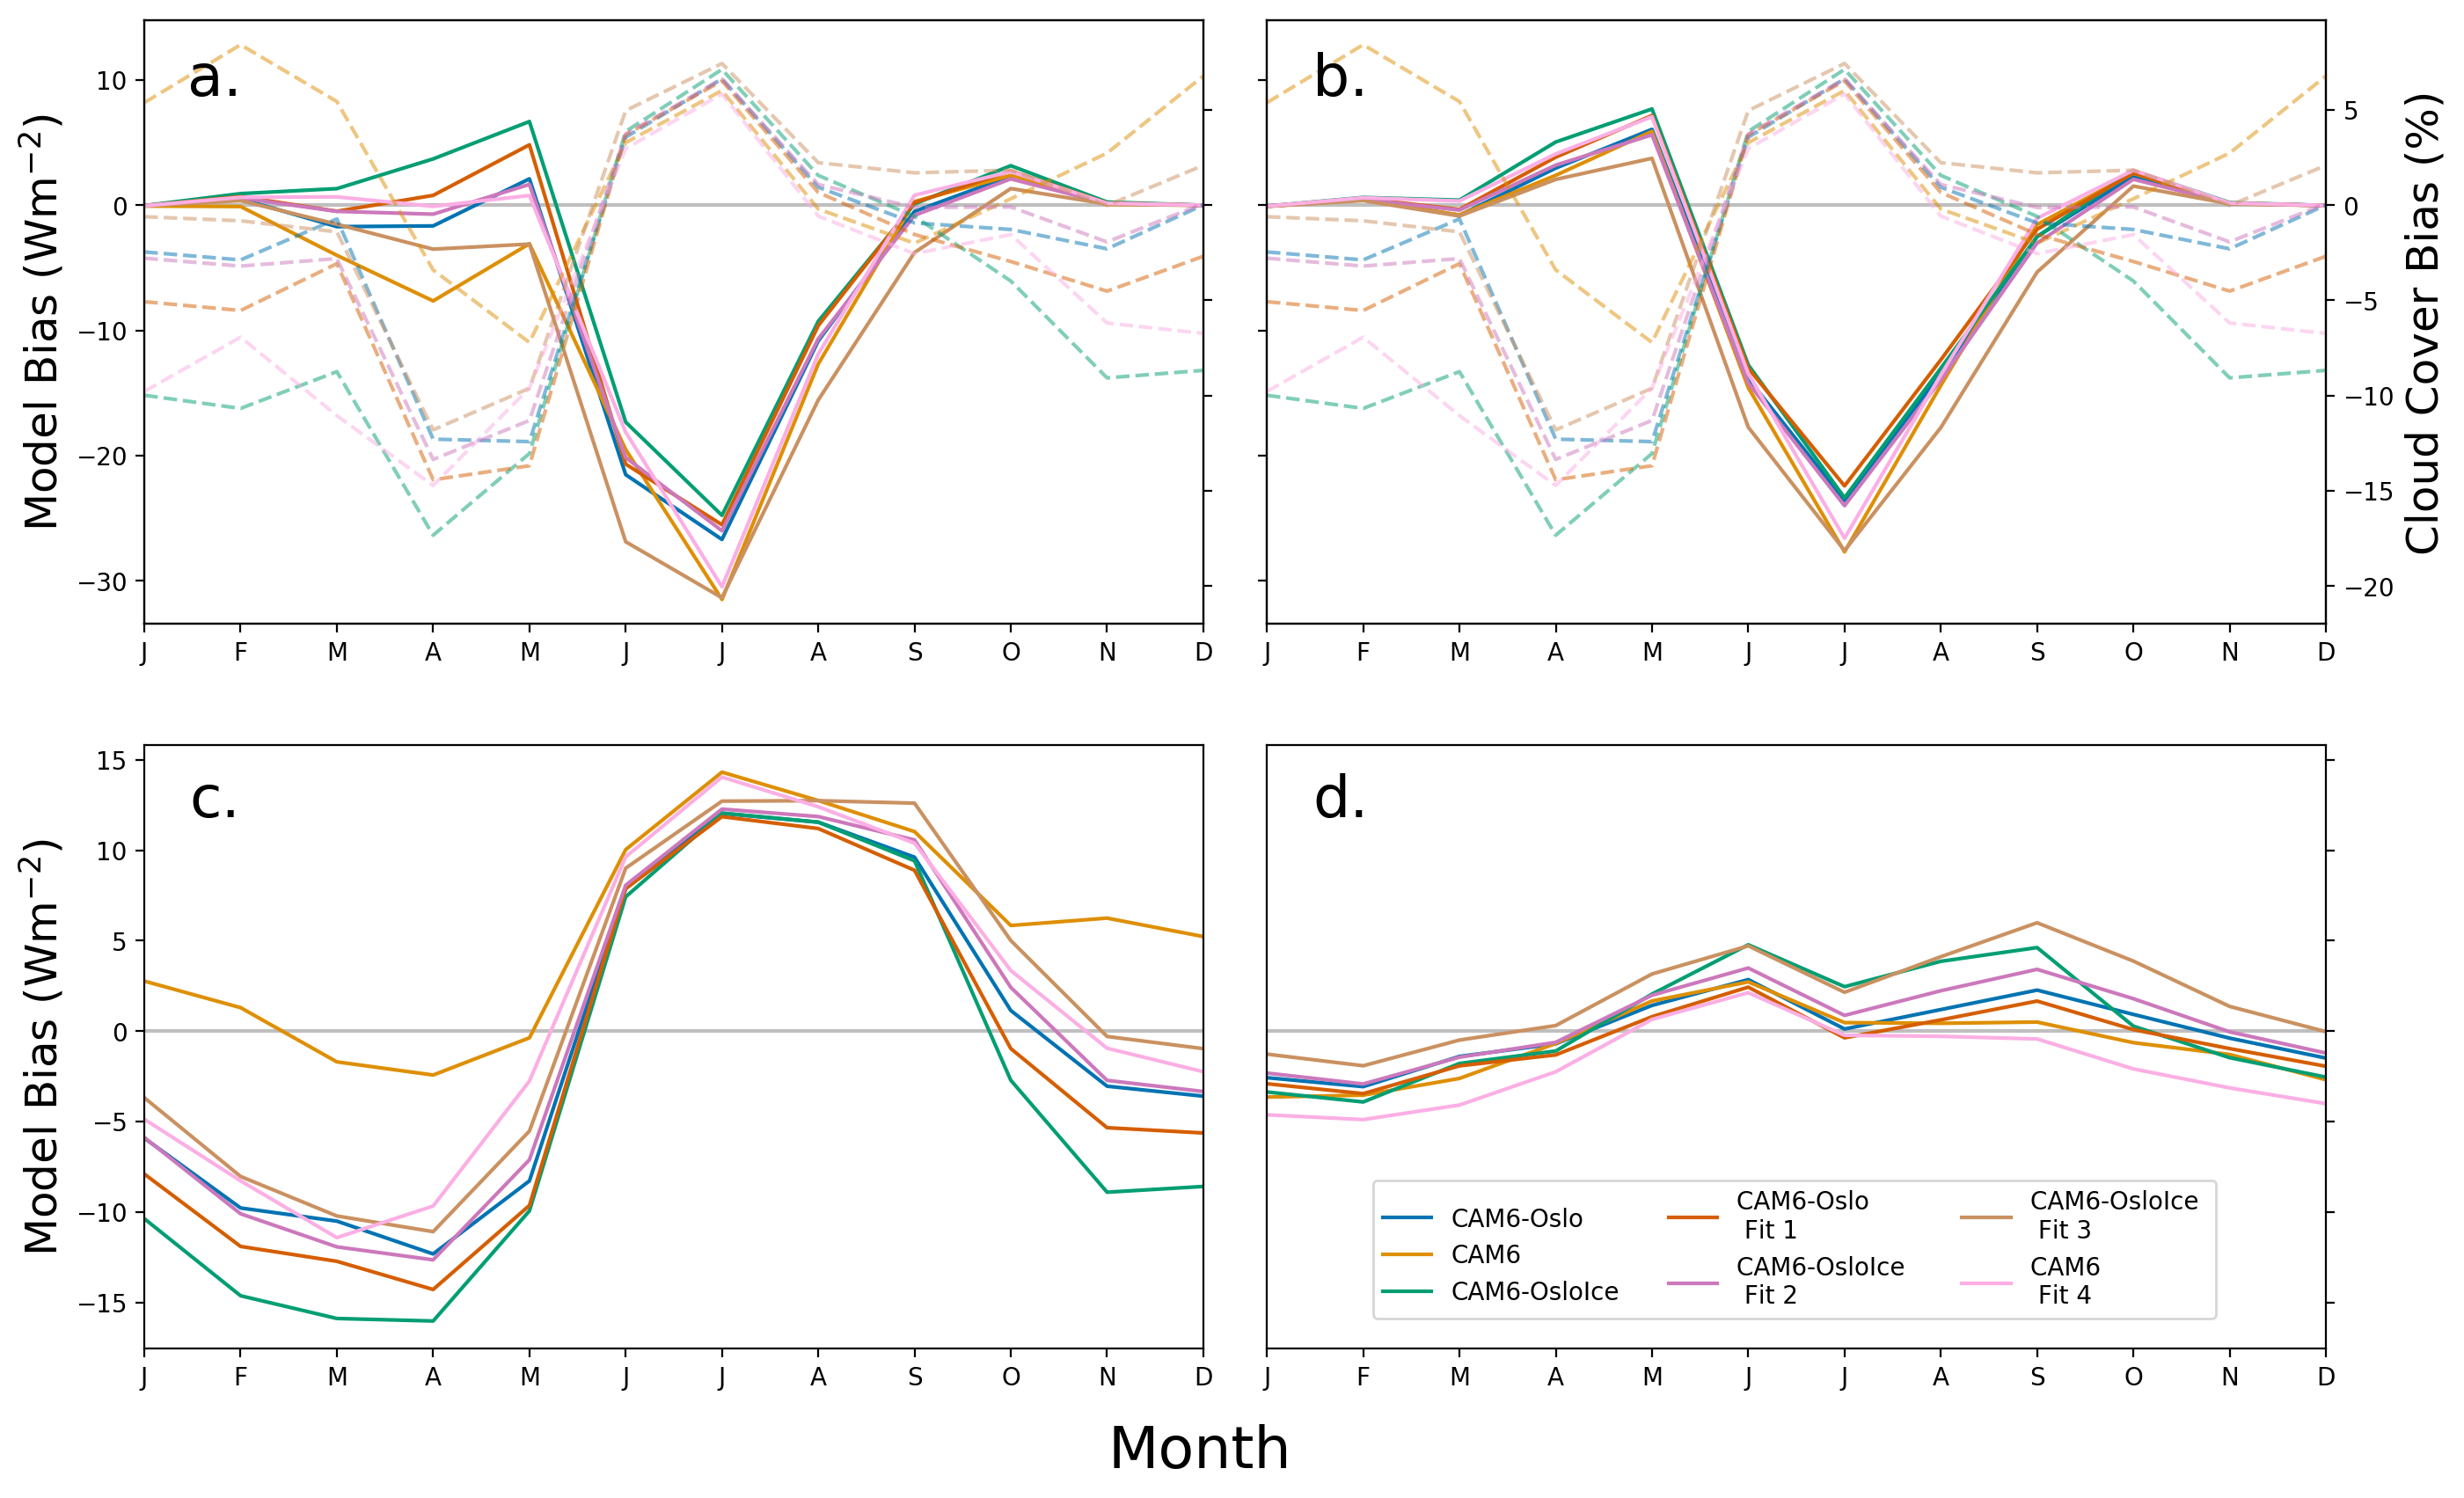

In [24]:
fig,axs = plt.subplots(nrows=2,ncols=2,sharey='row')
fig.set_figheight(10)
fig.set_figwidth(16)
fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.06)

allcases.plot_months_line('FSDS',ax=axs[0], bias=True)
allcases.plot_months_line('SWCF',ax=axs[1], bias=True)
allcases.plot_months_line('FLDS',ax=axs[2], bias=True)
allcases.plot_months_line('LWCF',ax=axs[3], bias=True)

ax0b = axs[0].twinx()
ax1b = axs[1].twinx()
allcases.plot_months_line('CLDTOT_CAL',ax=ax0b, bias=True, linestyle='dashed',alpha=0.5)
allcases.plot_months_line('CLDTOT_CAL',ax=ax1b, bias=True, linestyle='dashed',alpha=0.5)
# allcases.plot_months_line('CLDTOT_CAL_LIQ',ax=axs[2], bias=True, linestyle='dashed',alpha=0.5)
# allcases.plot_months_line('CLDTOT_CAL',ax=axs[3], bias=True, linestyle='dashed',alpha=0.5)

# Mute existing labels and draw zero lines
for i in axs:
    mute_ax(i)
    i.hlines(0,1,12, linestyle='solid',color='gray',alpha=0.5)
    i.set_xlim(1,12)
mute_ax(ax0b)
ax0b.set_yticklabels([])
mute_ax(ax1b)
# One legend
# axs[3].legend(loc='best',ncol=3)
axs[3].legend(loc=(0.1,0.05),ncol=3)

axs[0].set_ylabel(r'Model Bias (Wm$^{-2}$)',fontsize=18)
ax1b.set_ylabel(r'Cloud Cover Bias (%)',fontsize=18)
axs[2].set_ylabel(r'Model Bias (Wm$^{-2}$)',fontsize=18)
axs[3].yaxis.tick_right()

align_yaxis(axs[1], ax0b)
ax1b.set_ylim(ax0b.get_ylim())
# Trying Latex formatting
# plt.rc('text', usetex=False)
# plt.rc('font', family='serif')

# Re-label
# fig.text(0.1, 0.5, r'Model Bias (Wm$^{-2}$)', va='bottom', ha='center', rotation='vertical', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.95, 0.7, r'Cloud Cover Bias (%)', va='bottom', ha='center', rotation='vertical', 
#          rotation_mode='anchor', fontsize=18)
# fig.text(0.93, 0.5, r'Cloud Cover Bias (%)', va='bottom', ha='center', rotation='vertical', 
#          rotation_mode='anchor', fontsize=22)
fig.text(0.5, 0.05, 'Month', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.15, 0.83, 'a.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.55, 0.83, 'b.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.15, 0.42, 'c.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.55, 0.42, 'd.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

In [25]:
to_png(fig,'rad_biases3')

In [44]:
def janky_sharey(*lims):
    '''
    Pass pyplot axes objects.
    Calculates the global min and max and sets
    each axis.
    '''
    _list = []
    for i in lims:
        _list.append(np.array(i.get_ylim()))
    _array = np.array(_list)
    print(_array)
    _min,_ = np.min(_array,0)[0]
    _,_max = np.max(_array,0)[0]

In [45]:
janky_sharey(axs[0],axs[1])

[[-29.49446351  10.22869308]
 [-29.49446351  10.22869308]]


TypeError: cannot unpack non-iterable numpy.float64 object

In [49]:
np.array([np.array(axs[0].get_ylim()),np.array(axs[1].get_ylim())])

array([[-29.49446351,  10.22869308],
       [-29.49446351,  10.22869308]])